## Support Vector Regressor Implementation

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

### Lets create synthetic data points

noise parameter is sispersiing the data!

In [22]:

from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=10.0)

X,y

(array([[ 0.77379466,  0.7987262 ],
        [ 1.0843558 ,  0.45887296],
        [ 2.4036488 , -0.55306124],
        ...,
        [ 0.02899237, -0.39218092],
        [ 0.13401048,  0.19305962],
        [ 0.28562676,  1.09032466]]),
 array([ 9.88461171e+01,  9.49158968e+01,  7.41639992e+01,  1.65929927e+02,
         5.20974699e+01, -3.50845341e+01, -1.49530391e+02,  9.20061041e+01,
        -6.97177476e+01,  1.75550337e+02,  8.08398011e+01,  8.60327333e+01,
         1.37530569e+02,  5.32395572e+01,  1.14522066e+01,  4.20226203e+00,
        -1.03778191e+02, -4.46734959e+01,  1.70275601e+01, -6.17579924e+01,
         2.03499460e+02,  2.01445661e+02,  7.92188062e+01, -2.83527865e+01,
        -3.35142098e+01, -1.46838930e+01,  1.56396575e+02, -3.24005303e+01,
        -6.41045361e+01,  6.26704501e+01,  1.16075735e+02, -6.99139010e+01,
        -8.79338990e+01,  5.41807520e+01, -1.59365429e+02,  1.35025687e+02,
         4.45275085e+01, -1.62163301e+02,  1.19192579e+02,  4.33045432e+01,
         

In [23]:
pd.DataFrame(X)[0]

0      0.773795
1      1.084356
2      2.403649
3      0.352831
4      0.871926
         ...   
995    0.226981
996   -1.022652
997    0.028992
998    0.134010
999    0.285627
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

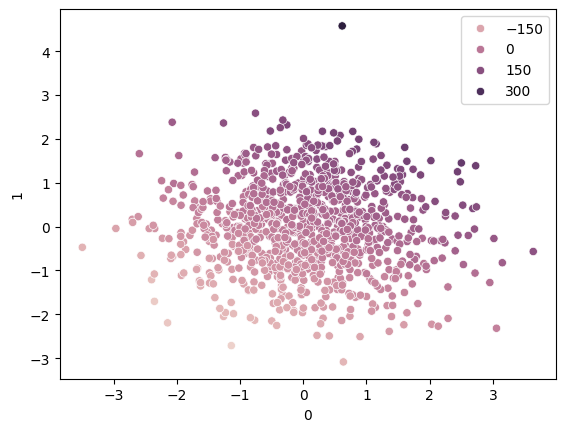

In [24]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [26]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [27]:
svr.coef_

array([[44.4102402 , 77.88059993]])

#### Prediction

In [28]:

y_pred=svr.predict(X_test)

### Score

In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9879771365459717


## Hyperparametere Tuning With SVR

In [30]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 50, 100, 150, 200],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [31]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.742 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.742 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamm

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 150, 200],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

### Best parameters found

In [33]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

### Prediction

In [34]:

y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9883333940331951


## Visualization of SVR

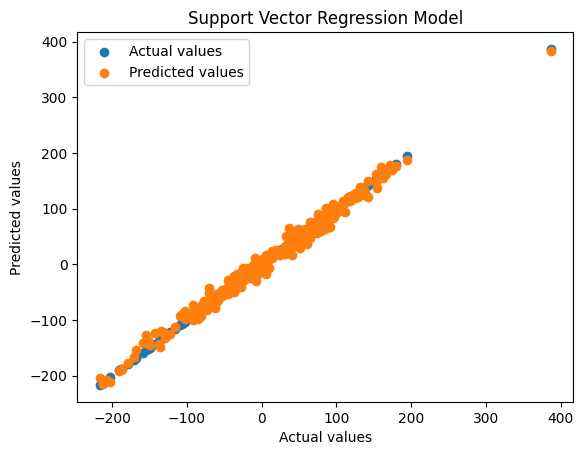

In [35]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.scatter(y_test, y_test, label='Actual values')

# Plot the predicted values
plt.scatter(y_test, y_pred, label='Predicted values')

# Add title and labels
plt.title('Support Vector Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### y_pred_1D is created cause once got error in dimension mistmatch .ravel() changes y_pred from 2D to 1D

In [36]:
y_pred_1D = y_pred.ravel() 

In [37]:
print( y_pred.shape, y_test.shape,y_pred_1D.shape)

(250,) (250,) (250,)


In [38]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred_1D, title='Support Vector Regression Model')
fig.update_layout(xaxis_title='Actual values', yaxis_title='Predicted values')
fig.show()

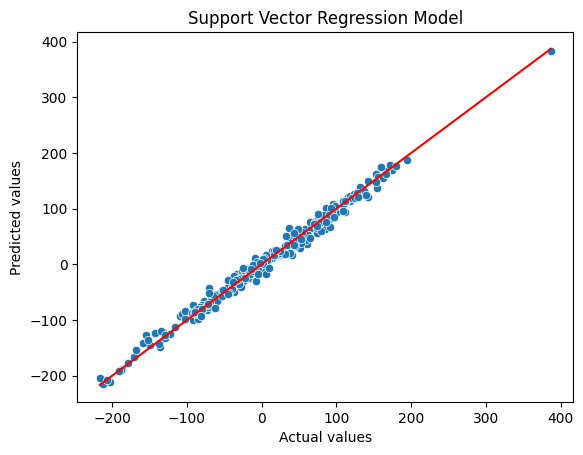

In [39]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred_1D)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title('Support Vector Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()